# 7_ML1

In [92]:
import warnings
warnings.filterwarnings('ignore')
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Logistic Regression Demo").getOrCreate()
file_location = "bank_is_deposit.csv"
file_type = "csv"
infer_schema = "False"
first_row_is_header = "True"
df = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.option("header", first_row_is_header) \
.load(file_location)

df.printSchema()

#SUMMARISING EACH COLUMN VALUES
df.summary().show()

22/10/15 15:53:26 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
root
 |-- age: string (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: string (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- campaign: string (nullable = true)
 |-- pdays: string (nullable = true)
 |-- previous: string (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|summary|               age|    job| marital|education|default|           balance|housing| loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|deposit|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|  count|             11162|  11162|   11162|    11162|  11162|             11162|  11162|11162|   11162|             11162|11162|             11162|             11162|             11162|             11162|   11162|  11162|
|   mean|41.231947679627304|   null|    null|     null|   null|1528.5385235620856|   null| null|    null

In [93]:
# CHECKING DATA DISTRIBUTION
df.printSchema() 
df.show(5) 

root
 |-- age: string (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: string (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- campaign: string (nullable = true)
 |-- pdays: string (nullable = true)
 |-- previous: string (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----

In [97]:
from pyspark.sql.types import *
#Identifying and assigning lists of variables
float_vars=['age', 'balance', 'duration','campaign','pdays','previous']
#Converting variables
for column in float_vars:
 df=df.withColumn(column,df[column].cast(IntegerType()))
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'string'),
 ('month', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('deposit', 'string')]

# Select features

In [98]:
#Select features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2
df2=df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')
df2.show(5)
cols=df2.columns

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 59|    admin.|married|secondary|     no|   2343|    yes|  no|       1|   -1|       0| unknown|    yes|
| 56|    admin.|married|secondary|     no|     45|     no|  no|       1|   -1|       0| unknown|    yes|
| 41|technician|married|secondary|     no|   1270|    yes|  no|       1|   -1|       0| unknown|    yes|
| 55|  services|married|secondary|     no|   2476|    yes|  no|       1|   -1|       0| unknown|    yes|
| 54|    admin.|married| tertiary|     no|    184|     no|  no|       2|   -1|       0| unknown|    yes|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
only showing top 5 rows



In [99]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SQL').getOrCreate()

#REGISTERING DF2 AS SQL TABLE NAMED "BANK"
df2.registerTempTable("bank") 

#FILTERING UNKNOWN VALUES USING FROM ALL THE COLUMNS USING "AND" "OR" LOGIC USING SPARKSQL
sqlfilter=spark.sql("SELECT * FROM bank WHERE job!='unknown' AND education!='unknown' AND marital!='unknown' AND loan!='unknown' AND (poutcome == 'failure' OR poutcome == 'success')")

22/10/15 15:54:34 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [100]:
#STORING IN NEW VARIABLE TO AVOID 'NONETYPE ERROR'
df2=sqlfilter

In [101]:
#DISPLAYING AND SUMMARIZING NEW DATA FRAME
df2.show()
df2.summary().show()

+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 33|    services| married|secondary|     no|   3444|    yes|  no|       1|   91|       4| failure|    yes|
| 56|  technician| married|secondary|     no|    589|    yes|  no|       1|  147|       2| success|    yes|
| 34|      admin.| married| tertiary|     no|    899|    yes|  no|       1|  170|       3| failure|    yes|
| 53|     retired| married| tertiary|     no|   2269|     no|  no|       2|  150|       1| success|    yes|
| 37|  technician| married|secondary|     no|   5115|    yes|  no|       2|  171|       4| failure|    yes|
| 45|entrepreneur| married|secondary|     no|    781|     no| yes|       2|  126|       2| failure|    yes|
| 46|  unemployed|divorced|s

+-------+------------------+----------+--------+---------+-------+------------------+-------+----+------------------+-----------------+------------------+--------+-------+
|summary|               age|       job| marital|education|default|           balance|housing|loan|          campaign|            pdays|          previous|poutcome|deposit|
+-------+------------------+----------+--------+---------+-------+------------------+-------+----+------------------+-----------------+------------------+--------+-------+
|  count|              2181|      2181|    2181|     2181|   2181|              2181|   2181|2181|              2181|             2181|              2181|    2181|   2181|
|   mean| 41.84364970197157|      null|    null|     null|   null| 1742.946813388354|   null|null|1.8211829436038514|202.8578633654287|3.0917010545621273|    null|   null|
| stddev|12.855329179952637|      null|    null|     null|   null|3397.7939950723485|   null|null|1.2274126864078023|121.3097255486155| 2.95

In [102]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [103]:
#SELECTING CATEGORICAL COLUMNS ONLY
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

#CREATING AN EMPTY LIST FOR PIPELINE AND ASSEMBLER
stages = []

In [104]:
#APPLYING FOR LOOP TO INDEX AND ENCODE ALL THE SELECTED COLUMNS
#APPLYING STRING INDEXER TO ALL THE CATEGORICAL COLUMNS AND STORING IT IN A NEW COLUMN WITH +INDEXED
#APPLYING ONE HOT ENCODER TO ALL THE INDEXED COLUMNS AND STORING IT IN A NEW COLUMN WITH +ENCODED

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + '_indexed')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "_encoded"])
    stages += [stringIndexer, encoder]
    
#INDEXING PREDICTOR COLUMN 'DEPOSIT' AS LABEL AND FEATURES    
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')

#CREATING STAGES FOR BOTH NUMERICAL AND CATEGORICAL COLUMNS
stages += [label_stringIdx]
numericCols = ['age', 'balance', 'campaign', 'pdays', 'previous']

#ADDING BOTH TI ASSEMBLER
assemblerInputs = [c + "_encoded" for c in categoricalColumns] + numericCols

#VECTORIZING TO CREATE A NEW FEATURES COLUMN WITH INDEXED AND ENCODED VALUES
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]


In [105]:
from pyspark.ml import Pipeline

In [106]:
#COMBINING ALL THE STAGES INTO ONE, FITTING DF2 AND TRANSFORMING IT

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df2)
df2 = pipelineModel.transform(df2)


In [107]:
#STORING IN NEW VARIABLE TO AVOID 'NONETYPE ERROR'
df3=df2

In [108]:
df3.show(5)

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+-----------+--------------+---------------+---------------+-----------------+-----------------+---------------+---------------+---------------+---------------+------------+-------------+----------------+----------------+-----+--------------------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|job_indexed|   job_encoded|marital_indexed|marital_encoded|education_indexed|education_encoded|default_indexed|default_encoded|housing_indexed|housing_encoded|loan_indexed| loan_encoded|poutcome_indexed|poutcome_encoded|label|            features|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+-----------+--------------+---------------+---------------+-----------------+-----------------+---------------+---------------+---------------+---------------+------------+-------------+------

In [18]:
#ADDING ALL THE ORIGINAL COLUMNS TO THE NEW DATA FRAME
selectedCols = ['label', 'features'] + cols
df3 = df3.select(selectedCols)

#DATA DISTRIBUTION OF NEW DATA FRAME
df3.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [19]:
df3.show(5)

+-----+--------------------+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|label|            features|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+-----+--------------------+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|  0.0|(23,[5,10,12,14,1...| 33|  services|married|secondary|     no|   3444|    yes|  no|       1|   91|       4| failure|    yes|
|  0.0|(23,[1,10,12,14,1...| 56|technician|married|secondary|     no|    589|    yes|  no|       1|  147|       2| success|    yes|
|  0.0|(23,[2,10,13,14,1...| 34|    admin.|married| tertiary|     no|    899|    yes|  no|       1|  170|       3| failure|    yes|
|  0.0|(23,[4,10,13,14,1...| 53|   retired|married| tertiary|     no|   2269|     no|  no|       2|  150|       1| success|    yes|
|  0.0|(23,[1,10,12,14,1...| 37|technician|married|secondary|     no|   5115

## Normalisation

In [109]:
#SELECTING ONLY THE ENCODED COLUMNS TO NORMALIZE  
from pyspark.ml.feature import MinMaxScaler
norm_vars=['features','job_encoded','marital_encoded','loan_encoded','default_encoded','education_encoded','housing_encoded','poutcome_encoded']

#USING MIN-MAX SCALER FUNCTION TO SCLE IT DOWN BETWEEN 0 AND 1
scaler = [MinMaxScaler(inputCol=scale_features ,outputCol=scale_features+ "_SCALED") for scale_features in norm_vars]

#PIPELINING FOR ALL THE COLUMNS AND FITTING IT AGAIN TO DF2
pipeline = Pipeline(stages=scaler)
scalerModel =  pipeline.fit(df2)
scaledData = scalerModel.transform(df2)

In [110]:
#DISPLAYING ALL THE NORMALIZED VALUES
scaledData.show(5)

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+-----------+--------------+---------------+---------------+-----------------+-----------------+---------------+---------------+---------------+---------------+------------+-------------+----------------+----------------+-----+--------------------+--------------------+------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|job_indexed|   job_encoded|marital_indexed|marital_encoded|education_indexed|education_encoded|default_indexed|default_encoded|housing_indexed|housing_encoded|loan_indexed| loan_encoded|poutcome_indexed|poutcome_encoded|label|            features|     features_SCALED|job_encoded_SCALED|marital_encoded_SCALED|loan_encoded_SCALED|default_encoded_SCALED|education_enc

In [111]:
#SELECTING ONLY THE REQUIRED COLUMNS FOR FURTHER SUPERVISED AND UNSUPERVISED LEARNING

df4=scaledData.select('deposit','label','features','job_encoded_SCALED','marital_encoded_SCALED','loan_encoded_SCALED','default_encoded_SCALED','education_encoded_SCALED','housing_encoded_SCALED','poutcome_encoded_SCALED','features_SCALED')

In [113]:
df4.show(5)

+-------+-----+--------------------+------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+--------------------+
|deposit|label|            features|job_encoded_SCALED|marital_encoded_SCALED|loan_encoded_SCALED|default_encoded_SCALED|education_encoded_SCALED|housing_encoded_SCALED|poutcome_encoded_SCALED|     features_SCALED|
+-------+-----+--------------------+------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+--------------------+
|    yes|  0.0|(23,[5,10,12,14,1...|    (10,[5],[1.0])|             [1.0,0.0]|              [1.0]|                 [1.0]|               [1.0,0.0]|                 [0.0]|                  [1.0]|(23,[5,10,12,14,1...|
|    yes|  0.0|(23,[1,10,12,14,1...|    (10,[1],[1.0])|             [1.0,0.0]|              [1.0]|                 [1.0]|               [1.0

In [24]:
df4.take(1)

[Row(deposit='yes', label=0.0, features=SparseVector(23, {5: 1.0, 10: 1.0, 12: 1.0, 14: 1.0, 16: 1.0, 17: 1.0, 18: 33.0, 19: 3444.0, 20: 1.0, 21: 91.0, 22: 4.0}), job_encoded_SCALED=SparseVector(10, {5: 1.0}), marital_encoded_SCALED=DenseVector([1.0, 0.0]), loan_encoded_SCALED=DenseVector([1.0]), default_encoded_SCALED=DenseVector([1.0]), education_encoded_SCALED=DenseVector([1.0, 0.0]), housing_encoded_SCALED=DenseVector([0.0]), poutcome_encoded_SCALED=DenseVector([1.0]), features_SCALED=SparseVector(23, {5: 1.0, 10: 1.0, 12: 1.0, 14: 1.0, 16: 1.0, 17: 1.0, 18: 0.2143, 19: 0.0533, 21: 0.1055, 22: 0.0556}))]

# Unsupervised learning

## K-means

In [26]:
# Perform unsupervised learning on df2 with k-means 
# You can use whole df2 as both training and testing data, 
# Evaluate the clustering result using Accuracy.  
from sklearn.datasets import make_blobs
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt  
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
%matplotlib inline

In [28]:
from pyspark.ml import Pipeline

#PERFORMING KMEANS CLUSTERING ON DF2 DATA FRAME
#WHOLE DATA IS USED AS TRAINING AND TESTING DATA AS IT IS UNSUPERVISED
kmeans = KMeans().setK(2).setSeed(742).setFeaturesCol("features")
model = kmeans.fit(df4)
predictions = model.transform(df4)
predictions.select('label', 'prediction').show(10000)


+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|     

In [66]:
#APPLYING KMEANS USING ELBOW METHOD TO GET THE OPTIMAL VALUE OF K TO HELP IN ANALYSIS IN REPORT
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans3=KMeans(featuresCol="features",k=3)
model_k3 = kmeans3.fit(df4)
predictions_kmean = model_k3.transform(df4)
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions_kmean)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.8978541591948958


In [67]:
#APPLYING FOR LOOP FOR REST OF THE VALUES OF K
for k in range(4,6):
    kmeans = KMeans(featuresCol='features_SCALED',k=k)
    models = kmeans.fit(df4)
    predictions = models.transform(df4)
# Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    print("With K={}".format(k))
    print("Silhouette with squared euclidean distance = " + str(silhouette))
    print('--'*45)

With K=4
Silhouette with squared euclidean distance = -0.41013010988090653
------------------------------------------------------------------------------------------


With K=5
Silhouette with squared euclidean distance = -0.4838467155770496
------------------------------------------------------------------------------------------


In [69]:
#FINDING CLUSTER CENTRES FOR THE FIRST KMEANS WE HAD APPLIED TO DF2
centers = models.clusterCenters()
print("Cluster Centers: ")
for center in centers:
 print(center)

Cluster Centers: 
[0.01886792 0.23113208 0.28301887 0.13207547 0.00235849 0.11556604
 0.15330189 0.01886792 0.00707547 0.01886792 0.         0.80188679
 0.95518868 0.         0.99528302 0.48584906 0.90330189 0.58254717
 0.23066038 0.02701264 0.0780446  0.26499978 0.03821628]
[0.52538071 0.16497462 0.06598985 0.02791878 0.00761421 0.01015228
 0.06091371 0.05076142 0.06345178 0.00761421 0.         1.
 0.         0.99238579 0.99492386 0.62182741 0.94923858 0.47208122
 0.22316896 0.03543468 0.07429626 0.21717914 0.03764805]
[0.04790419 0.20658683 0.20359281 0.         0.22754491 0.14820359
 0.00598802 0.07185629 0.0254491  0.02994012 0.94461078 0.
 0.84281437 0.         0.99550898 0.58383234 0.88922156 0.52095808
 0.44792558 0.03242173 0.06940664 0.23834687 0.04155578]
[0.         0.         0.         1.         0.         0.
 0.         0.         0.         0.         0.87745098 0.03921569
 0.60294118 0.00490196 1.         0.24509804 0.84313725 0.73039216
 0.33802521 0.02594789 0.083333

In [70]:
#CONVERTING THE PREDICTION AND LABEL DATA FRAME TO PANDAS FOR ACCURACY
import numpy as np
from sklearn.metrics import accuracy_score

#USING TOPANDAS FUNCTION FOR CONVERSION
y_true=predictions.toPandas()
y_pred=predictions.toPandas()

#USING ACCURACY FUNCTION TO FIND ACCURACY
accuracy_score(y_true.label, y_pred.prediction)


0.1632278771205869

## Principal Component Analysis(PCA)

In [71]:
#IMPORTING PACKAGES FOR PCA
from pyspark.ml.feature import PCA
from pyspark.mllib.linalg.distributed import RowMatrix
from sklearn.feature_extraction import DictVectorizer
from __future__ import print_function
from pyspark.ml.feature import  VectorAssembler
from pyspark.mllib.linalg import Vectors
from pyspark.ml import Pipeline
import numpy as np

#APPLYING PCA FUNCTION TO NORMALIZED FEATURE COLUMN ONLY
pca = PCA(k=2, inputCol='features_SCALED', outputCol='pcaFeature')

#FITTING AND TRANSFORMING THE DATA
model = pca.fit(df4)

resultdf = model.transform(df4).show(5)


+-------+-----+--------------------+------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+--------------------+--------------------+
|deposit|label|            features|job_encoded_SCALED|marital_encoded_SCALED|loan_encoded_SCALED|default_encoded_SCALED|education_encoded_SCALED|housing_encoded_SCALED|poutcome_encoded_SCALED|     features_SCALED|          pcaFeature|
+-------+-----+--------------------+------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+--------------------+--------------------+
|    yes|  0.0|(23,[5,10,12,14,1...|    (10,[5],[1.0])|             [1.0,0.0]|              [1.0]|                 [1.0]|               [1.0,0.0]|                 [0.0]|                  [1.0]|(23,[5,10,12,14,1...|[0.96364248505161...|
|    yes|  0.0|(23,[1,10,12,14,1...|    (10,[1],[1.0])| 

In [73]:
#DISPLAYING ONLY PREDICTOR VARIABLE AND ITS PCA FEATURES
result = model.transform(df4).select("deposit","pcaFeature")
result.show(truncate=False)

+-------+-----------------------------------------+
|deposit|pcaFeature                               |
+-------+-----------------------------------------+
|yes    |[0.9636424850516162,0.33138114789353396] |
|yes    |[0.8373410183626985,0.3880024159205378]  |
|yes    |[-0.10845002652577136,0.6564023408615192]|
|yes    |[-0.4795609426699976,1.1082617061108204] |
|yes    |[0.9576794865061865,0.27146436786874945] |
|yes    |[0.7879027918969115,0.5145147352059626]  |
|yes    |[0.5124304692668894,-0.19176487082431343]|
|yes    |[-0.7369547765884157,1.0356901001261154] |
|yes    |[-0.1028260652716233,0.6718228060101591] |
|yes    |[1.0661514594146067,0.32850428644471624] |
|yes    |[-0.32474294634017603,0.8134787300694883]|
|yes    |[-0.21097521651898585,0.7625432021333829]|
|yes    |[0.9643915702012149,0.32767154073159427] |
|yes    |[0.8970032005901829,0.35148141971077346] |
|yes    |[0.47244006359865365,0.6034483574148239] |
|yes    |[0.7840860892766278,0.4214589589329853]  |
|yes    |[-0

In [74]:
#IMPORTING PACKAGES FOR SCATTER PLOT
from pyspark.ml.linalg import Vectors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#SEPRATING THE PCA FEATURES AS PER DEPOSIT RESPONSE0
#COLLECT FUNCTION TO CONVERT IT FROM SPARK DATAFRAME TO NUMPY DATA FRAME
x=result.select('pcaFeature').where(result.deposit=='yes').collect()
y=result.select('pcaFeature').where(result.deposit=='no').collect()

#CREATING EMPTY LIST FOR APPENDING
ycomp1=[]
ncomp1=[]
ycomp2=[]
ncomp2=[]

#FOR LOOP FOR FIRST ARRAY
for row in x:
  array=row['pcaFeature'].toArray()
  ycomp1.append(array[0])
  ncomp1.append(array[1])

#FOR LOOP FOR SECOND ARRAY 
for row in y:
  array=row['pcaFeature'].toArray()
  ycomp2.append(array[0])
  ncomp2.append(array[1])


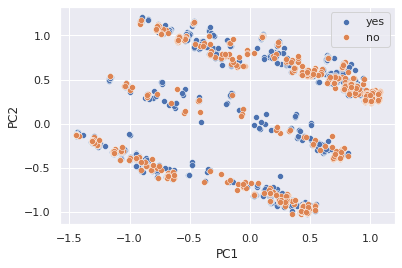

In [75]:
#USING SEABORN PACKAGE FOR PLOTTING
sns.scatterplot(ycomp1,ncomp1)
sns.scatterplot(ycomp2,ncomp2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(["yes",'no'])

# Supervised learning

In [77]:
#SPLITTING NORMALIZED DATA FRAME INTO 70% AND 30% RATIO
train, test = df4.randomSplit([0.7, 0.3], seed = 742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))
print(predictions)

Training Dataset Count: 1540
Test Dataset Count: 641
DataFrame[deposit: string, label: double, features: vector, job_encoded_SCALED: vector, marital_encoded_SCALED: vector, loan_encoded_SCALED: vector, default_encoded_SCALED: vector, education_encoded_SCALED: vector, housing_encoded_SCALED: vector, poutcome_encoded_SCALED: vector, features_SCALED: vector, prediction: int]


## Logistic Regression Model

In [37]:
#IMPORTING PACKAGES FOR LOGISTIC REGRESSION
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 

#FITTING A LOGISTIC REGRESSION MODEL TO TRAIN DATA USING NORMALIZED FEATURES
lr = LogisticRegression(featuresCol = 'features_SCALED', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)



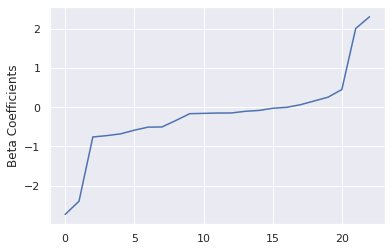

In [38]:
#SORTING AND PLOTTING ALL THE 23 COEFFICIENTS OF THE MODEL
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)

#PLOTTING AND LABELLING
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [39]:
#PRINTING COEFFICIENTS AND INTERCEPT FOR THE MODEL
print(beta)

print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

[-2.73586717e+00 -2.39917417e+00 -7.57680549e-01 -7.24004979e-01
 -6.78885101e-01 -5.84879604e-01 -5.06639013e-01 -5.02323835e-01
 -3.37848531e-01 -1.63465025e-01 -1.55302106e-01 -1.46913745e-01
 -1.45504446e-01 -1.03660325e-01 -8.07490750e-02 -2.54808540e-02
 -1.08994829e-03  6.50840744e-02  1.61404773e-01  2.57816377e-01
  4.53879474e-01  2.01197967e+00  2.31217978e+00]
Coefficients: [-0.1455044461207159,-0.0010899482889323623,-0.025480853954775885,0.2578163766589017,-0.3378485305789781,-0.08074907498032702,-0.7576805488395173,-0.678885101079696,0.16140477305471884,0.4538794744299883,-0.10366032494024682,-0.14691374454538023,-0.16346502469590238,-0.5066390128378919,-0.5848796042054513,-0.7240049791475263,-0.5023238346956287,2.0119796674510497,-0.15530210578563003,-2.7358671737007514,2.312179780239366,0.06508407439963516,-2.3991741671432236]
Intercept: -0.2357614870921092


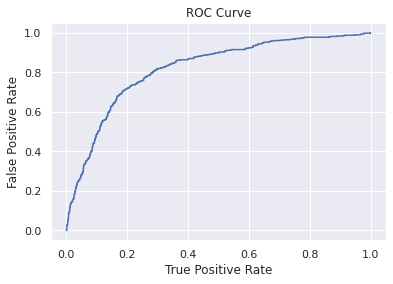

Training set areaUnderROC: 0.8183745264297244


In [40]:
#CALCULATING ROC AND PLOTTING IT
#USING SUMMARY FUNCTION TO GET ALL THE PARAMETERS
trainingSummary = lrModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

BETTER THE ROC BETTER THE MODEL

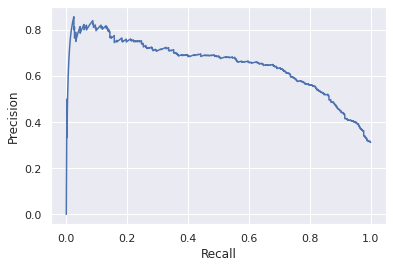

In [41]:
#PLOTTING RECALL VS PRECISION GRAPH
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [79]:
#CALCULATING PREDICTION AND PROBABILITY FOR ALL THE FEATURES
predictionsLR = lrModel.transform(test)
predictionsLR.select( 'features','label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|(23,[0,10,12,14,1...|  1.0|[2.41064394654608...|       0.0|[0.91763536489496...|
|(23,[0,10,12,14,1...|  1.0|[-0.1636071332480...|       1.0|[0.45918920897245...|
|(23,[0,10,12,14,1...|  1.0|[-0.2985059737566...|       1.0|[0.42592275087819...|
|(23,[0,10,13,14,1...|  1.0|[0.97150621698727...|       0.0|[0.72541961696403...|
|(23,[0,10,13,14,1...|  1.0|[0.83585750141027...|       0.0|[0.69759204129555...|
|(23,[0,10,13,14,1...|  1.0|[0.89635433953602...|       0.0|[0.71019974250638...|
|(23,[0,10,13,14,1...|  1.0|[-0.2675008588998...|       1.0|[0.43352073310329...|
|(23,[0,10,13,14,1...|  1.0|[-1.2385812621749...|       1.0|[0.22468303412713...|
|(23,[0,10,13,14,1...|  1.0|[0.02902941348534...|       0.0|[0.50725684376249...|
|(23,[0,10,13,14

In [43]:
#USING BINARYCLASS EVALUATOR FOR TEST AREA UNDER ROC CALCULATION
#DEFAULT METRIC FOR BINARY CLASS IS AREA UNDER ROC

from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictionsLR))

Test Area Under ROC 0.8047027710704856


In [44]:
#PRINTING ONLY LABEL AND PREDICTION FOR ACCURACY CALCULATION
accdf=predictions.select("label","prediction").show(5)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|         2|
|  0.0|         2|
|  0.0|         4|
|  0.0|         4|
|  0.0|         2|
+-----+----------+
only showing top 5 rows



In [45]:
#MULTICLASS EVALUATOR FOR ACCURACY USING PREDICTION AND LABEL COLUMNS
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

my_eval1 = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='label', metricName='accuracy')
acc = my_eval1.evaluate(predictionsLR)
print("accuracy=%g" %(acc))

accuracy=0.75195


In [46]:
#CALCULATING CONFUSION MATRIX OF THE LR MODEL USING MULTICLASS METRICS
from pyspark.mllib.evaluation import MulticlassMetrics
predandlabel=predictionsLR.select( 'label', 'prediction').rdd
metrics = MulticlassMetrics(predandlabel)
print(metrics.confusionMatrix())

DenseMatrix([[365.,  78.],
             [ 81., 117.]])


In [47]:
#METRICS FOR PRECISION, RECALL AND F1SCORE
cm=metrics.confusionMatrix().toArray()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
f1score =((2*precision*recall )/ (precision + recall))

print("Logistic regression:precision,recall,f1score",precision,recall,f1score)

Logistic regression:precision,recall,f1score 0.8183856502242153 0.8239277652370203 0.8211473565804275


<AxesSubplot:>

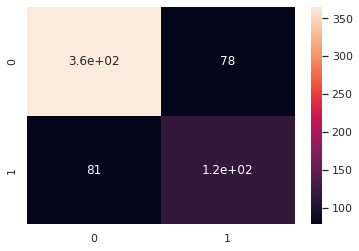

In [48]:
#PLOTTING HEATMAP OF ALL THE METRICS PARAMETERS USING SEABORN PACKAGE
import seaborn as sns
sns.heatmap(cm, annot=True)

## Decision Tree Model

In [49]:
#IMPORTING PACKAGE FOR DECISION TREE MODEL
#FITTING TRAIN AND TEST DATA USING FEATURES AND LABEL COLUMNS
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions1 = dtModel.transform(test)
predictions1.select( 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+-------------+----------+--------------------+
|label|rawPrediction|prediction|         probability|
+-----+-------------+----------+--------------------+
|  1.0| [655.0,63.0]|       0.0|[0.91225626740947...|
|  1.0|[167.0,294.0]|       1.0|[0.36225596529284...|
|  1.0|[167.0,294.0]|       1.0|[0.36225596529284...|
|  1.0| [199.0,98.0]|       0.0|[0.67003367003367...|
|  1.0| [199.0,98.0]|       0.0|[0.67003367003367...|
|  1.0| [199.0,98.0]|       0.0|[0.67003367003367...|
|  1.0| [199.0,98.0]|       0.0|[0.67003367003367...|
|  1.0| [199.0,98.0]|       0.0|[0.67003367003367...|
|  1.0|[167.0,294.0]|       1.0|[0.36225596529284...|
|  1.0|[167.0,294.0]|       1.0|[0.36225596529284...|
+-----+-------------+----------+--------------------+
only showing top 10 rows



In [50]:
#CALCULATING AREA UNDER ROC
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions1, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7771760377141542


In [51]:
#CALCULATING ACCURACY USING MULTICLASS EVALUATOR
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

my_eval2 = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='label', metricName='accuracy')
acc = my_eval2.evaluate(predictions1)
print("accuracy=%g" %(acc))

accuracy=0.764431


In [52]:
#PRINTING CONFUSION MATRIX FOR DECISION TREE MODEL
from pyspark.mllib.evaluation import MulticlassMetrics
predandlabel=predictions1.select( 'label', 'prediction').rdd
metrics1 = MulticlassMetrics(predandlabel)
print(metrics1.confusionMatrix())

DenseMatrix([[364.,  69.],
             [ 82., 126.]])


In [53]:
#METRICS FUNCTION TO EVALUATE RECALL, PRECISION AND F1SCORE
cm=metrics1.confusionMatrix().toArray()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
f1score =((2*precision*recall )/ (precision + recall))

print("Decision Tree:precision,recall,f1score",precision,recall,f1score)

Decision Tree:precision,recall,f1score 0.8161434977578476 0.8406466512702079 0.8282138794084187


In [54]:
#PRINTING ALL THE IMPORTANT FEATURES
dtModel.featureImportances

SparseVector(23, {1: 0.0075, 3: 0.0282, 15: 0.1401, 17: 0.7534, 21: 0.0597, 22: 0.0112})

<AxesSubplot:>

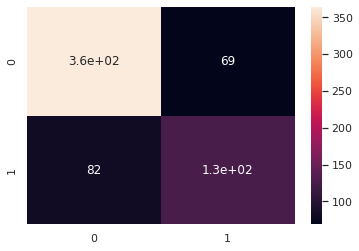

In [55]:
#PLOTTING METRICS AS SEABORN
import seaborn as sns
sns.heatmap(cm, annot=True)

## Naive Bayes Model

In [58]:
#IMPORTING NAIVE BAYES PACKAGE
from pyspark.ml.classification import NaiveBayes

#SELECTING NORMALIZED COLUMNS FOR MODELLING
nbdf=predictions.select('label','job_encoded_SCALED','marital_encoded_SCALED','loan_encoded_SCALED','default_encoded_SCALED','education_encoded_SCALED','housing_encoded_SCALED','poutcome_encoded_SCALED','features_SCALED',"prediction")

In [59]:
#RENAMING SCALED FEATURES COLUMN TO 'FEATURES' FOR NAIVE BAYES MODEL 
nbdf = nbdf.selectExpr("label as label","features_SCALED as features")
nbdf.show(3)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(23,[5,10,12,14,1...|
|  0.0|(23,[1,10,12,14,1...|
|  0.0|(23,[2,10,13,14,1...|
+-----+--------------------+
only showing top 3 rows



In [60]:
#SPLITTING THE LABEL AND FEATURES DATA AS TRAIN AND TEST DATA
trainbn, testnb = nbdf.randomSplit([0.7, 0.3], seed = 742)

In [61]:
#APPLYTING NAIVE BAYES AND FITTING INTO TEST AND TRAIN DATA
#USING MULTINOMIAL METHOD BECAUSE BERNOULLI REQUIRES ONLY BINARY INPUT
nb1=NaiveBayes(modelType="multinomial")
nbmodel=nb1.fit(trainbn)
nb_predictions=nbmodel.transform(testnb)

nb_evaluator=MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction",metricName="accuracy")

#EVALUATING PREDICTION AND PROBABILITY VALUES
nb_accuracy=nb_evaluator.evaluate(nb_predictions)
nb_predictions.select( 'label', 'rawPrediction', 'prediction', 'probability').show(10)


print("Test Area Under ROC: " + str(evaluator.evaluate(nb_predictions, {evaluator.metricName: "areaUnderROC"})))

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[-18.128101289108...|       0.0|[0.71227863685887...|
|  0.0|[-18.905025587194...|       0.0|[0.83308795651024...|
|  0.0|[-17.210598336493...|       0.0|[0.83078085549233...|
|  0.0|[-16.368239992271...|       0.0|[0.82011846673742...|
|  0.0|[-18.122511379455...|       0.0|[0.51656396890790...|
|  0.0|[-18.379947725811...|       0.0|[0.52612872952829...|
|  0.0|[-17.219309198880...|       0.0|[0.54173239419087...|
|  0.0|[-19.904541403547...|       0.0|[0.80183300993376...|
|  0.0|[-22.618681384194...|       0.0|[0.76733814845131...|
|  0.0|[-20.750414292819...|       0.0|[0.80281500588117...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows



Test Area Under ROC: 0.5786054421768712


In [62]:
#CALCULATING ACCURACY
print("accuracy=%g" %(nb_accuracy))

accuracy=0.74415


In [63]:
#PRINTING CONFUSION MATRIX FOR NAIVE BAYES MODEL
from pyspark.mllib.evaluation import MulticlassMetrics
predandlabel=nb_predictions.select( 'label', 'prediction').rdd
metrics2 = MulticlassMetrics(predandlabel)
print(metrics2.confusionMatrix())

DenseMatrix([[386., 109.],
             [ 55.,  91.]])


In [64]:
#CALCULATING PRECISION, RECALL AND F1SCORE
cm2=metrics2.confusionMatrix().toArray()
precision=(cm2[0][0])/(cm2[0][0]+cm2[1][0])
recall=(cm2[0][0])/(cm2[0][0]+cm2[0][1])
f1score =((2*precision*recall )/ (precision + recall))

print("NAIVE BAYES:precision,recall,f1score",precision,recall,f1score)

NAIVE BAYES:precision,recall,f1score 0.8752834467120182 0.7797979797979798 0.8247863247863249


<AxesSubplot:>

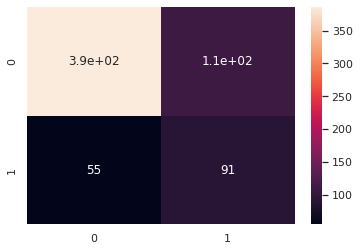

In [65]:
#PLOTTING METRICS VALUE IN SEABORN
import seaborn as sns
sns.heatmap(cm2, annot=True)